In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('collegePlace.csv')

In [3]:
# Data preprocessing
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Stream = le.fit_transform(df.Stream)
x = df.drop(['PlacedOrNot'], axis=1)
y = df.PlacedOrNot


In [4]:

# Model selection and evaluation
model = RandomForestClassifier(n_estimators=100)
cross_val_scores = cross_val_score(model, x, y, cv=3)
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())


Cross-validation scores: [0.84529828 0.85136502 0.89979757]
Mean accuracy: 0.8654869557030166


In [33]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=57)

In [34]:
# Train the Random Forest model
model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
# Make predictions
y_pred = model.predict(X_test)

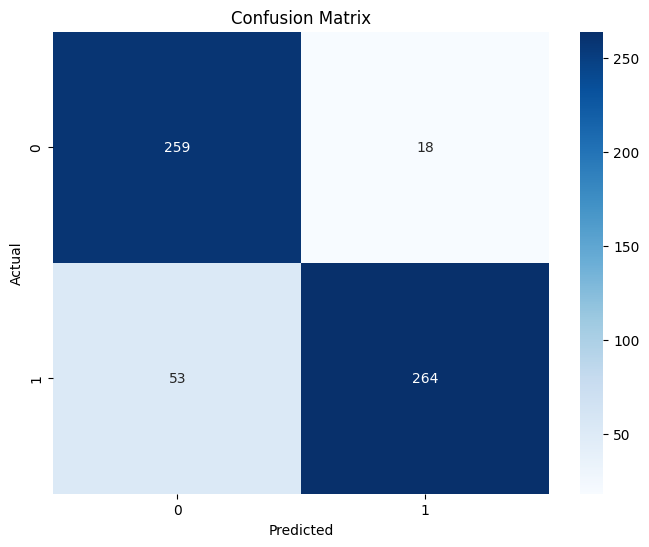

In [36]:
# Calculate confusion matrix and plot heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()